In [ ]:
# lfNqtrbyg5FzmCxrLZSfeYUn2HtEWeGx
# BGabh0hn0hbChusf

In [8]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

In [9]:
class Mygraphstate(TypedDict):
    count:int
    msg:str

In [10]:
def counter(state: Mygraphstate) -> Mygraphstate:
    state['count']+=1
    state['msg']=f"Count is {state['count']}"
    return state

In [11]:
workflow = StateGraph(Mygraphstate)

workflow.add_node("Node1", counter)
workflow.add_node("Node2", counter)
workflow.add_node("Node3", counter)

workflow.add_edge(START, "Node1")
workflow.add_edge("Node1","Node2")
workflow.add_edge("Node2","Node3")
workflow.add_edge("Node3",END)



In [12]:
app = workflow.compile()

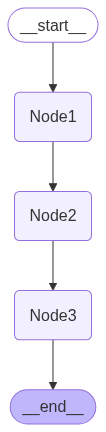

In [13]:
app

In [15]:
app.invoke({'count':0,'msg':'hello'})

{'count': 3, 'msg': 'Count is 3'}

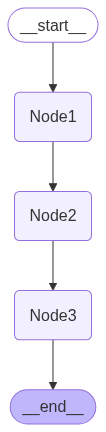

In [16]:
from IPython.display import Image, display
png = app.get_graph().draw_mermaid_png()
display(Image(png))

In [2]:
!pip install typing

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26397 sha256=b5c50f8d3a55d3eb2c82bfab2f6e3b43df03774bb702cb3423561fed1bfc91ee
  Stored in directory: /Users/shashwatkushwaha/Library/Caches/pip/wheels/5d/1b/f4/fbdc2bc618f0ba7aec7295d67f62d40e6027a6ce14df9ec3c8
Successfully built typing


In [8]:
from dataclasses import dataclass
from typing import Callable
from autogen_core import DefaultTopicId, MessageContext, RoutedAgent, default_subscription , message_handler

In [9]:
@dataclass
class Message:
    content:int

@default_subscription
class Modifier(RoutedAgent):
    def __init__(self, modify_val:Callable[[int],int]) ->None:
        super().__init__("A modifier agent")
        self.modify_val = modify_val

    @message_handler
    async def handle_message(self, message:Message, ctx:MessageContext) -> None:
        val = self.modify_val(message.content)
        print(f"{'-'*80}\nModifier:\nModified {message.content} to {val}")
        await self.publish_message(Message(content=val),DefaultTopicId)
        
@default_subscription
class Checker(RoutedAgent):
    def __init__(self, run_until: Callable[[int], bool]) -> None:
        super().__init__("A checker agent.")
        self._run_until = run_until

    @message_handler
    async def handle_message(self, message: Message, ctx: MessageContext) -> None:
        if not self._run_until(message.content):
            print(f"{'-'*80}\nChecker:\n{message.content} passed the check, continue.")
            await self.publish_message(Message(content=message.content), DefaultTopicId())
        else:
            print(f"{'-'*80}\nChecker:\n{message.content} failed the check, stopping.")
        

In [10]:
# Create a function that doubles a number
def double(x: int) -> int:
    return x * 2

# Create the modifier agent
modifier = Modifier(double)

In [11]:
modifier

In [14]:
print(Modifier(double(5)))

In [21]:
import uuid
from autogen import LocalRuntime
runtime = LocalRuntime()
modifier = Modifier(double)
modifier.set_runtime(runtime)

async def test_modifier():
    test_message = Message(content=5)
    
    ctx = MessageContext(
        sender="test_sender",
        topic_id=DefaultTopicId,
        is_rpc=False,
        cancellation_token=None,
        message_id=str(uuid.uuid4())
    )
    
    await modifier.handle_message(test_message, ctx)

# Run the test
await test_modifier()

ImportError: cannot import name 'LocalRuntime' from 'autogen' (/Users/shashwatkushwaha/Desktop/prep/voyagerAI/voyager/lib/python3.13/site-packages/autogen/__init__.py)

In [22]:
import autogen
print(f"AutoGen version: {autogen.__version__}")

# Check what's available
print("\nAvailable in autogen:")
print([attr for attr in dir(autogen) if not attr.startswith('_')])

import autogen_core
print(f"\nAutoGen Core version: {autogen_core.__version__}")

print("\nAvailable in autogen_core:")
print([attr for attr in dir(autogen_core) if not attr.startswith('_')])

AutoGen version: 0.9.0

Available in autogen:
['Agent', 'AgentNameConflictError', 'AssistantAgent', 'Cache', 'ChatResult', 'ContextExpression', 'ConversableAgent', 'DEFAULT_MODEL', 'FAST_MODEL', 'GroupChat', 'GroupChatManager', 'InvalidCarryOverTypeError', 'LLMConfig', 'ModelClient', 'NoEligibleSpeakerError', 'OpenAIWrapper', 'SenderRequiredError', 'UndefinedNextAgentError', 'UpdateSystemMessage', 'UserProxyAgent', 'a_initiate_swarm_chat', 'a_run_swarm', 'agentchat', 'cache', 'code_utils', 'coding', 'config_list_from_dotenv', 'config_list_from_json', 'config_list_from_models', 'config_list_gpt4_gpt35', 'config_list_openai_aoai', 'doc_utils', 'events', 'exception_utils', 'fast_depends', 'filter_config', 'formatting_utils', 'gather_usage_summary', 'get_config_list', 'graph_utils', 'import_utils', 'initiate_chats', 'io', 'json_utils', 'llm_config', 'logger', 'logging', 'oai', 'register_function', 'run_swarm', 'runtime_logging', 'token_count_utils', 'tools', 'types', 'version']

AutoGen Co

In [23]:
import uuid
from autogen_core import (
    DefaultTopicId, MessageContext, RoutedAgent, default_subscription, 
    message_handler, SingleThreadedAgentRuntime
)
from dataclasses import dataclass
from typing import Callable

@dataclass
class Message:
    content: int

class Modifier(RoutedAgent):
    def __init__(self, modify_val: Callable[[int], int]) -> None:
        super().__init__("A modifier agent")
        self.modify_val = modify_val

    @message_handler
    async def handle_message(self, message: Message, ctx: MessageContext) -> None:
        val = self.modify_val(message.content)
        print(f"{'-'*80}\nModifier:\nModified {message.content} to {val}")
        await self.publish_message(Message(content=val), DefaultTopicId)

def double(x: int) -> int:
    return x * 2

# Create runtime and agent
runtime = SingleThreadedAgentRuntime()
modifier = Modifier(double)
modifier.set_runtime(runtime)

# Test the agent
async def test_modifier():
    test_message = Message(content=5)
    
    ctx = MessageContext(
        sender="test_sender",
        topic_id=DefaultTopicId,
        is_rpc=False,
        cancellation_token=None,
        message_id=str(uuid.uuid4())
    )
    
    await modifier.handle_message(test_message, ctx)

# Run the test
await test_modifier()

AttributeError: 'Modifier' object has no attribute 'set_runtime'

In [24]:
from typing import List, TypedDict, Optional
from autogen_core.tools import FunctionTool

# --- 1. Autosuggest --------------------------------------------------------

class Place(TypedDict):
    entityId: str      # internal Skyscanner place ID
    iataCode: str      # IATA code (e.g. "DEL")
    name: str          # e.g. "New Delhi"

def autosuggest(query: str, country: str, locale: str) -> List[Place]:
    """
    Query Autosuggest for cities/airports matching `query`.
    Returns a list of Place dicts (entityId, iataCode, name).
    """
    # TODO: requests.get(... partners.api.skyscanner.net/.../autosuggest ...)
    return []

AutosuggestTool = FunctionTool(
    func=autosuggest,
    name="autosuggest",
    description=autosuggest.__doc__,
)

# --- 2. Culture ------------------------------------------------------------

class CultureInfo(TypedDict):
    markets: List[str]     # e.g. ["IN", "UK", ...]
    locales: List[str]     # e.g. ["en-GB", "hi-IN", ...]
    currencies: List[str]  # e.g. ["INR", "GBP", ...]


def get_culture() -> CultureInfo:
    """
    Fetch supported markets, locales, and currencies.
    """
    # TODO: requests.get(... /culture endpoint ...)
    return {"markets": [], "locales": [], "currencies": []}

CultureTool = FunctionTool(
    func=get_culture,
    name="get_culture",
    description=get_culture.__doc__,
)

# --- 3. Flights Live Prices: Create Session -------------------------------

class QueryLeg(TypedDict):
    origin_place_id: str
    destination_place_id: str
    date: str  # "YYYY-MM-DD"

class FlightCreateRequest(TypedDict):
    market: str
    locale: str
    currency: str
    query_legs: List[QueryLeg]
    adults: int
    cabin_class: Optional[str]  # e.g. "Economy"

class FlightCreateResponse(TypedDict):
    sessionToken: str

def create_flight_session(req: FlightCreateRequest) -> FlightCreateResponse:
    """
    POST /flights/live/search/create → returns sessionToken.
    """
    # TODO: requests.post(..., json=req, headers={"x-api-key": ...})
    return {"sessionToken": ""}

CreateFlightSessionTool = FunctionTool(
    func=create_flight_session,
    name="create_flight_session",
    description=create_flight_session.__doc__,
)

# --- 4. Flights Live Prices: Poll Session ---------------------------------

class FlightQuote(TypedDict):
    quoteId: str
    minPrice: float
    direct: bool
    # …plus itinerary references, carriers, etc.

class FlightPollResponse(TypedDict):
    quotes: List[FlightQuote]
    done: bool   # whether polling is complete

def poll_flight_session(sessionToken: str) -> FlightPollResponse:
    """
    POST /flights/live/search/poll/{sessionToken} → incremental quotes.
    """
    # TODO: requests.post(..., headers={"x-api-key", ...})
    return {"quotes": [], "done": True}

PollFlightSessionTool = FunctionTool(
    func=poll_flight_session,
    name="poll_flight_session",
    description=poll_flight_session.__doc__,
)

# --- 5. Carriers -----------------------------------------------------------

class Carrier(TypedDict):
    id: str       # numeric carrierId used in quotes
    code: str     # IATA code, e.g. "AI"
    name: str     # full airline name

def get_carriers() -> List[Carrier]:
    """
    GET /carriers → list of all airlines (id, code, name).
    """
    # TODO: requests.get(... /carriers endpoint ...)
    return []

CarriersTool = FunctionTool(
    func=get_carriers,
    name="get_carriers",
    description=get_carriers.__doc__,
)

# --- 6. Affiliates Link (or Shallow Link) ---------------------------------

class BookingLinkResponse(TypedDict):
    url: str

def generate_booking_link(
    sessionToken: str, quoteId: str, market: str, locale: str, currency: str
) -> BookingLinkResponse:
    """
    POST /affiliates/link or /browse/flights → returns a booking URL.
    """
    # TODO: requests.post(..., json={…}, headers={"x-api-key": …})
    return {"url": ""}

BookingLinkTool = FunctionTool(
    func=generate_booking_link,
    name="generate_booking_link",
    description=generate_booking_link.__doc__,
)

# --- Tool Loader ----------------------------------------------------------

def load_skyscanner_tools() -> List[FunctionTool]:
    return [
        AutosuggestTool,
        CultureTool,
        CreateFlightSessionTool,
        PollFlightSessionTool,
        CarriersTool,
        BookingLinkTool,
    ]


In [25]:
import requests

# Replace these with your real credentials
API_KEY    = "lfNqtrbyg5FzmCxrLZSfeYUn2HtEWeGx"
API_SECRET = "BGabh0hn0hbChusf"

resp = requests.post(
    "https://test.api.amadeus.com/v1/security/oauth2/token",
    headers={"Content-Type": "application/x-www-form-urlencoded"},
    data={
        "grant_type":    "client_credentials",
        "client_id":     API_KEY,
        "client_secret": API_SECRET,
    },
)
resp.raise_for_status()
token_data = resp.json()

access_token = token_data["access_token"]
expires_in   = token_data["expires_in"]

print("Bearer token:", access_token)
print("Valid for (s):", expires_in)

Bearer token: ezlA00VXUZif69y5Tiz2XgNt9Qpc
Valid for (s): 1799


In [28]:
headers = {"Authorization": f"Bearer {access_token}"}
resp = requests.get(
    "https://test.api.amadeus.com/v2/shopping/flight-offers",
    headers=headers,
    params={
        "origin":        "DEL",
        "destination":   "BOM",
        "departureDate": "2025-07-16",
        "adults":        1
    },
)

In [30]:
resp = requests.get(
    "https://test.api.amadeus.com/v2/shopping/flight-offers",
    headers={"Authorization": f"Bearer {access_token}"},
    params={
        "originLocationCode":      "DEL",
        "destinationLocationCode": "BOM",
        "departureDate":           "2025-07-15",
        "adults":                  1
    },
)
print(resp.status_code, resp.json())

200 {'meta': {'count': 105, 'links': {'self': 'https://test.api.amadeus.com/v2/shopping/flight-offers?originLocationCode=DEL&destinationLocationCode=BOM&departureDate=2025-07-15&adults=1'}}, 'data': [{'type': 'flight-offer', 'id': '1', 'source': 'GDS', 'instantTicketingRequired': False, 'nonHomogeneous': False, 'oneWay': False, 'isUpsellOffer': False, 'lastTicketingDate': '2025-06-28', 'lastTicketingDateTime': '2025-06-28', 'numberOfBookableSeats': 9, 'itineraries': [{'duration': 'PT2H15M', 'segments': [{'departure': {'iataCode': 'DEL', 'terminal': '3', 'at': '2025-07-15T12:35:00'}, 'arrival': {'iataCode': 'BOM', 'terminal': '2', 'at': '2025-07-15T14:50:00'}, 'carrierCode': 'AI', 'number': '2993', 'aircraft': {'code': '32N'}, 'operating': {'carrierCode': 'AI'}, 'duration': 'PT2H15M', 'id': '42', 'numberOfStops': 0, 'blacklistedInEU': False}]}], 'price': {'currency': 'EUR', 'total': '58.06', 'base': '49.00', 'fees': [{'amount': '0.00', 'type': 'SUPPLIER'}, {'amount': '0.00', 'type': 'TI

In [33]:
!pip install amadeus

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for amadeus: filename=amadeus-12.0.0-py2.py3-none-any.whl size=67555 sha256=9eeef64d96192e34a3877c1235cd1358c32f278a5fdf40c2ed7c7eccfabc8c6a
  Stored in directory: /Users/shashwatkushwaha/Library/Caches/pip/wheels/9f/14/7a/64f4aaf3b322eacdd97e65b78948132fd53be04f6c44039e8a
Successfully built amadeus


In [34]:
from amadeus import Client, ResponseError

amadeus = Client(client_id=API_KEY, client_secret=API_SECRET)
try:
    offers = amadeus.shopping.flight_offers_search.get(
        originLocationCode="DEL",
        destinationLocationCode="BOM",
        departureDate="2025-07-15",
        adults=1
    ).data
    print(offers)
except ResponseError as e:
    print(e)

[{'type': 'flight-offer', 'id': '1', 'source': 'GDS', 'instantTicketingRequired': False, 'nonHomogeneous': False, 'oneWay': False, 'isUpsellOffer': False, 'lastTicketingDate': '2025-06-28', 'lastTicketingDateTime': '2025-06-28', 'numberOfBookableSeats': 9, 'itineraries': [{'duration': 'PT2H15M', 'segments': [{'departure': {'iataCode': 'DEL', 'terminal': '3', 'at': '2025-07-15T12:35:00'}, 'arrival': {'iataCode': 'BOM', 'terminal': '2', 'at': '2025-07-15T14:50:00'}, 'carrierCode': 'AI', 'number': '2993', 'aircraft': {'code': '32N'}, 'operating': {'carrierCode': 'AI'}, 'duration': 'PT2H15M', 'id': '42', 'numberOfStops': 0, 'blacklistedInEU': False}]}], 'price': {'currency': 'EUR', 'total': '58.06', 'base': '49.00', 'fees': [{'amount': '0.00', 'type': 'SUPPLIER'}, {'amount': '0.00', 'type': 'TICKETING'}], 'grandTotal': '58.06'}, 'pricingOptions': {'fareType': ['PUBLISHED'], 'includedCheckedBagsOnly': True}, 'validatingAirlineCodes': ['AI'], 'travelerPricings': [{'travelerId': '1', 'fareOpt

In [35]:
import json

data = resp.json()       # your JSON → Python dict/list
print(json.dumps(data,
                 indent=2,         # 2-space indentation
                 sort_keys=True,    # optional: alphabetical keys
                 ensure_ascii=False # optional: keep unicode chars
                ))

{
  "data": [
    {
      "id": "1",
      "instantTicketingRequired": false,
      "isUpsellOffer": false,
      "itineraries": [
        {
          "duration": "PT2H15M",
          "segments": [
            {
              "aircraft": {
                "code": "32N"
              },
              "arrival": {
                "at": "2025-07-15T14:50:00",
                "iataCode": "BOM",
                "terminal": "2"
              },
              "blacklistedInEU": false,
              "carrierCode": "AI",
              "departure": {
                "at": "2025-07-15T12:35:00",
                "iataCode": "DEL",
                "terminal": "3"
              },
              "duration": "PT2H15M",
              "id": "42",
              "number": "2993",
              "numberOfStops": 0,
              "operating": {
                "carrierCode": "AI"
              }
            }
          ]
        }
      ],
      "lastTicketingDate": "2025-06-28",
      "lastTicketingDateTime

In [36]:
from amadeus import Client
amadeus = Client(client_id = "lfNqtrbyg5FzmCxrLZSfeYUn2HtEWeGx", client_secret = "BGabh0hn0hbChusf")

In [37]:
response = amadeus.reference_data.locations.get(keyword="DEL", subType="CITY")
places = response.data

In [38]:
places

[{'type': 'location',
  'subType': 'CITY',
  'name': 'DELHI',
  'detailedName': 'DELHI/DL/IN',
  'id': 'CDEL',
  'self': {'href': 'https://test.api.amadeus.com/v1/reference-data/locations/CDEL',
   'methods': ['GET']},
  'timeZoneOffset': '+05:30',
  'iataCode': 'DEL',
  'geoCode': {'latitude': 28.56639, 'longitude': 77.10306},
  'address': {'cityName': 'DELHI',
   'cityCode': 'DEL',
   'countryName': 'INDIA',
   'countryCode': 'IN',
   'stateCode': 'DL',
   'regionCode': 'ASIA'},
  'analytics': {'travelers': {'score': 32}}},
 {'type': 'location',
  'subType': 'CITY',
  'name': 'SAN JOSE DEL CABO',
  'detailedName': 'SAN JOSE DEL CABO/MX',
  'id': 'CSJD',
  'self': {'href': 'https://test.api.amadeus.com/v1/reference-data/locations/CSJD',
   'methods': ['GET']},
  'timeZoneOffset': '-07:00',
  'iataCode': 'SJD',
  'geoCode': {'latitude': 23.15195, 'longitude': -109.7211},
  'address': {'cityName': 'SAN JOSE DEL CABO',
   'cityCode': 'SJD',
   'countryName': 'MEXICO',
   'countryCode': '

In [39]:
response = amadeus.reference_data.airlines.get()
carriers = response.data
carriers

[{'type': 'airline',
  'iataCode': 'SI',
  'icaoCode': 'BCI',
  'businessName': 'BLUE ISLANDS',
  'commonName': 'BLUE ISLANDS'},
 {'type': 'airline',
  'iataCode': 'G5',
  'icaoCode': 'HXA',
  'businessName': 'CHINA EXPRESS AIRLINES',
  'commonName': 'CHINA EXPRESS AIRLINES'},
 {'type': 'airline',
  'iataCode': 'G6',
  'businessName': 'FLY ARNA',
  'commonName': 'FLY ARNA'},
 {'type': 'airline',
  'iataCode': 'G7',
  'icaoCode': 'GJS',
  'businessName': 'GOJET AIRLINES',
  'commonName': 'GOJET AIRLINES'},
 {'type': 'airline',
  'iataCode': 'G8',
  'icaoCode': 'GOW',
  'businessName': 'GO FIRST',
  'commonName': 'GO FIRST'},
 {'type': 'airline',
  'iataCode': 'G9',
  'icaoCode': 'ABY',
  'businessName': 'AIR ARABIA',
  'commonName': 'AIR ARABIA'},
 {'type': 'airline',
  'iataCode': 'GA',
  'icaoCode': 'GIA',
  'businessName': 'GARUDA INDONESIA',
  'commonName': 'GARUDA'},
 {'type': 'airline', 'iataCode': 'GB', 'businessName': 'UNDEFINED'},
 {'type': 'airline', 'iataCode': 'GC', 'busines

In [40]:
response = amadeus.shopping.flight_offers_search.get(
    originLocationCode="DEL",
    destinationLocationCode="BOM",
    departureDate="2025-07-15",
    adults=1
)
offers = response.data

In [41]:
offers

[{'type': 'flight-offer',
  'id': '1',
  'source': 'GDS',
  'instantTicketingRequired': False,
  'nonHomogeneous': False,
  'oneWay': False,
  'isUpsellOffer': False,
  'lastTicketingDate': '2025-06-28',
  'lastTicketingDateTime': '2025-06-28',
  'numberOfBookableSeats': 9,
  'itineraries': [{'duration': 'PT2H15M',
    'segments': [{'departure': {'iataCode': 'DEL',
       'terminal': '3',
       'at': '2025-07-15T12:35:00'},
      'arrival': {'iataCode': 'BOM',
       'terminal': '2',
       'at': '2025-07-15T14:50:00'},
      'carrierCode': 'AI',
      'number': '2993',
      'aircraft': {'code': '32N'},
      'operating': {'carrierCode': 'AI'},
      'duration': 'PT2H15M',
      'id': '42',
      'numberOfStops': 0,
      'blacklistedInEU': False}]}],
  'price': {'currency': 'EUR',
   'total': '58.06',
   'base': '49.00',
   'fees': [{'amount': '0.00', 'type': 'SUPPLIER'},
    {'amount': '0.00', 'type': 'TICKETING'}],
   'grandTotal': '58.06'},
  'pricingOptions': {'fareType': ['PUBL

In [42]:
response = amadeus.shopping.flight_offers.pricing.post(offers[0])
confirmed = response.data
confirmed

{'type': 'flight-offers-pricing',
 'flightOffers': [{'type': 'flight-offer',
   'id': '1',
   'source': 'GDS',
   'instantTicketingRequired': False,
   'nonHomogeneous': False,
   'paymentCardRequired': False,
   'lastTicketingDate': '2025-06-28',
   'itineraries': [{'segments': [{'departure': {'iataCode': 'DEL',
        'terminal': '3',
        'at': '2025-07-15T12:35:00'},
       'arrival': {'iataCode': 'BOM',
        'terminal': '2',
        'at': '2025-07-15T14:50:00'},
       'carrierCode': 'AI',
       'number': '2993',
       'aircraft': {'code': '32N'},
       'operating': {'carrierCode': 'AI'},
       'duration': 'PT2H15M',
       'id': '42',
       'numberOfStops': 0,
       'co2Emissions': [{'weight': 80,
         'weightUnit': 'KG',
         'cabin': 'ECONOMY'}]}]}],
   'price': {'currency': 'EUR',
    'total': '58.06',
    'base': '49.00',
    'fees': [{'amount': '0.00', 'type': 'SUPPLIER'},
     {'amount': '0.00', 'type': 'TICKETING'},
     {'amount': '0.00', 'type': 'FOR

In [43]:
response = amadeus.booking.flight_orders.post(offers[0], traveler_info)
order   = response.data

NameError: name 'traveler_info' is not defined

In [44]:
response = amadeus.shopping.hotel_offers_search.get(
  hotelIds="RTPAR001", adults=2
)
hotels = response.data

NetworkError: [---]

In [ ]:
hotels